# Vent Data Exploration

Before diving into Emotion Detection / Classification, it's a good idea to take a look at our data to see if there may be formatting problems, noisy data, or other similar aspects that might lower data quality and make our task harder. Onwards!

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
ROOT_PATH = str(Path('.').parent.absolute().parent)

vent = pd.read_parquet('{}/preprocessed/vent.parquet'.format(ROOT_PATH))

In [3]:
def deitalize(string):
    return string.replace('_', '')

def normalize_text(string):
    if string is None:
        return ''
    replaced_refs = string.replace('_USER_REFERENCE_', '[NAME]')
    replaced_urls = replaced_refs.replace('_URL_/', '[URL]').replace('_URL_', '[URL]')
    undo_italics = deitalize(replaced_urls)
    return undo_italics


In [4]:
vent.text = [normalize_text(text) for text in vent.text]

In [5]:
print('\n\n$$$$$$$$$$$$$$$$$$$$$$$\n\n'.join(vent.text[-10:].tolist()))

/ jail
Our penal systems are just not good. They reinforce violence and all the bad tendencies and thoughts in the convicts. 

These people probably had bad childhoods and experiences that made them who they are now.. Australia was a goodish idea, you could let them start a fresh, 

They need good communities in which they can reintegrate with, support systems and so on, not gang and racial violence and abuse.

$$$$$$$$$$$$$$$$$$$$$$$

When I had those mystical superhuman experiences a year ago while I was high and manic, it wasnt the drugs, I realise now it was hypnosis.

I had mistakenly hypnotised myself by watching videos on repeat and staring at patterns etc, so now that I know that, I can do all of the stuff back then without any drugs. 
Like superhuman strength and pain resistance. 
Memory, confidence, grace all of that and more.
Self hypnosis works.

$$$$$$$$$$$$$$$$$$$$$$$

Okay I'm going to go for my daily dose of self hypnosis. 
Bomb af stuff, it will make you feel a decade 

# Vent Length Analysis

Another important aspect is to choose an appropriate length for the input sequences. Let's take a look at the data.

In [6]:
import string

SEPARATOR_CHAR_SET = set(string.whitespace + string.punctuation)

def count_tokens(string):
    previous_sep = False
    separator_count = 0
    for char in string:
        if char in SEPARATOR_CHAR_SET:
            if previous_sep:
                continue
            previous_sep = True
            separator_count += 1
        else:
            previous_sep = False
    # Do not count trailing separator
    if previous_sep:
        separator_count -= 1
    return separator_count + 1


In [7]:
vent_token_counts = [count_tokens(string) for string in vent.text]

In [8]:
len(vent_token_counts)

32883737

In [10]:
np.mean(vent_token_counts)

32.274320373015996

In [11]:
np.percentile(vent_token_counts, [50, 75, 90, 95, 99])

array([ 17.,  32.,  60.,  97., 299.])

In [12]:
np.std(vent_token_counts)

77.22023538615214

In [13]:
np.max(vent_token_counts)

184813

(array([6.23888e+05, 3.92801e+05, 6.72115e+05, ..., 0.00000e+00,
        2.00000e+00, 1.00000e+00]),
 array([1.0000000e+00, 1.9988000e+00, 2.9976000e+00, ..., 2.4960024e+03,
        2.4970012e+03, 2.4980000e+03]),
 <a list of 2500 Patch objects>)

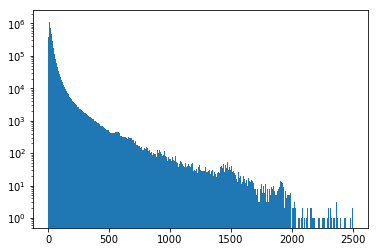

In [26]:
import matplotlib.pyplot as plt

token_bound = 2500 # np.mean(vent_token_counts) + 5 * np.std(vent_token_counts) + 500

plt.yscale('log', nonposy='clip')
plt.hist([x for x in vent_token_counts if x < token_bound], bins=token_bound)